基本程序 mass eigenvalue

In [3]:
import os # 操作系统相关模块
import time # 时间模块
import math # 数学模块
import cmath as cm # 复数数学模块
import numpy as np   # 数值运算  pip install numpy
from numpy import *
from sympy.matrices import Matrix, GramSchmidt
# import matplotlib as plt      # 绘图模块
import matplotlib.pyplot as plt
import scipy as sp           # 数值计算库
import scipy.special as S    # 特殊函数库
import random as rd    # 随机选取数值
from numpy import random as nr   # 随机的包
from numpy import *   # 导入numpy所有语法 
from scipy import constants as C    # 常数库
from scipy import *
from IPython.display import Latex
import itertools
from tqdm import tqdm 
font={'family':'Times New Roman'}
def cot(a):
    return 1/np.tan(a)

# VEV and SM Higgs mass
v,mh= 246,125
i,j=1,0

# a loop to slect date
while i>0:

    # Input parameter 
    beta, psi, epsilon= rd.uniform(0,pi/2.0), rd.uniform(0,pi/2.0), rd.uniform(0,pi/2.0)
    alpha, gamma_1, gamma_2 =rd.uniform(0,pi*2.0),rd.uniform(0,pi*2.0),rd.uniform(0,pi*2.0)
    dm_2, lambda_89 = rd.uniform(-100**2,100**2), rd.uniform(0,sqrt(50.0))
    
    s_beta,s_psi,s_2psi,s_epsilon,s_alpha,s_gamma_1,s_gamma_2 = sin(beta),sin(psi),sin(2*psi),sin(epsilon),sin(alpha),sin(gamma_1),sin(gamma_2)
    c_beta,c_psi,c_2psi,c_epsilon,c_alpha,c_gamma_1,c_gamma_2 = cos(beta),cos(psi),cos(2*psi),cos(epsilon),cos(alpha),cos(gamma_1),cos(gamma_2)
    t_beta,t_psi,t_2psi,t_epsilon,t_alpha,t_gamma_1,t_gamma_2 = tan(beta),tan(psi),tan(2*psi),tan(epsilon),tan(alpha),tan(gamma_1),tan(gamma_2)
    cot_beta,cot_psi,cot_2psi,cot_epsilon,cot_alpha,cot_gamma_1,cot_gamma_2 = cot(beta),cot(psi),cot(2*psi),cot(epsilon),cot(alpha),cot(gamma_1),cot(gamma_2)
    s_2beta,s_4psi,c_4psi=sin(2*beta),sin(4*psi),cos(4*psi)
    
    # Avoid danger angle and negitive aii
    aii = (mh**2+dm_2*c_alpha*c_gamma_1*s_2beta*t_epsilon<0 or 
           dm_2*s_2beta/(t_epsilon*c_alpha*c_gamma_1)+mh**2 *(1 - t_gamma_1/(cot_gamma_2+t_2psi/c_beta))<0 or 
           v**2*lambda_89*c_gamma_2*s_beta**2*t_alpha/s_gamma_1+mh**2 *(1 - cot_gamma_1/(cot_gamma_2+t_2psi/c_beta))<0 or
           v**2*lambda_89*s_gamma_1*s_beta**2/(t_alpha*c_gamma_2)+mh**2 *(1 - t_gamma_2/(cot_gamma_2+t_2psi/c_beta))<0 or
           (c_2psi*c_beta*cot_gamma_2+s_2psi<0))
    danger_angle=(c_alpha==0) or (c_beta==0) or (s_beta==0) or (s_gamma_1==0) or (c_gamma_2==0) \
            or (c_2psi*c_beta*c_gamma_2+s_2psi*s_gamma_2==0)
    if danger_angle or aii:
        continue
    
    # other parameter
    m22_2 = 1/2*(mh**2+dm_2*(c_alpha*c_gamma_1*t_epsilon*s_2beta-2*c_beta**2))
    m11_2 = dm_2 +m22_2
    lambda_5 = -(mh**2*s_gamma_2)/(v**2*(c_2psi*c_beta*c_gamma_2+s_2psi*s_gamma_2))
    Lambda = lambda_5*(c_beta*c_2psi)/s_beta**2*(c_4psi*cot_gamma_1-2*c_beta*t_2psi) \
        + c_4psi*(mh**2/(v**2*s_beta**2)-lambda_5*cot_beta**2*s_2psi+lambda_89*c_gamma_2/s_gamma_1*t_alpha)
    re_lambda_9 = -c_2psi*(lambda_5*c_beta/(s_beta**2)*(c_2psi**2*c_beta+1/2*cot_gamma_1*s_4psi)\
                            +s_2psi*(mh**2/(v**2*s_beta**2)+lambda_89*c_gamma_2/s_gamma_1*t_alpha))
    re_lambda_8 = 1/2*(lambda_5*c_2psi*c_beta/s_beta**2*(c_2psi**2*cot_gamma_1-t_gamma_2)-lambda_89*cot_alpha*s_gamma_1/c_gamma_2\
                    -mh**2/v**2*s_2psi**2/s_beta**2+c_2psi**2*(-lambda_5*cot_beta**2*s_2psi+lambda_89*c_gamma_2/s_gamma_1*t_alpha))
    Lambda_2 = Lambda - 2*re_lambda_8 -re_lambda_9*t_2psi
    lambda_34 = 1/v**2 *(2*s_beta**2*dm_2 - mh**2 + 2*m22_2) - (cot_epsilon*dm_2*s_2beta)/(c_alpha*c_gamma_1*v**2) \
        -lambda_5*(s_2psi+c_2psi*c_beta*t_gamma_1)
    lambda_2 = (2*m22_2-re_lambda_9*s_beta**2*t_2psi*v**2 - c_beta**2*v**2*lambda_34)/(2*s_beta**2*v**2)
    lambda_34_2 = -2*(re_lambda_8-Lambda-lambda_2)
    lambda_1 = (2*m11_2-s_beta**2*v**2*lambda_34 - s_2psi*s_beta**2*v**2*lambda_5)/(2*c_beta**2*v**2)
    
    # perturbativity constraints
    if (abs(lambda_1)>5) or  (abs(lambda_2)>5) or (abs(lambda_34)>10) or (abs(lambda_34_2)>10) or(abs(lambda_5)>5) or (abs(re_lambda_8)>5) or (abs(re_lambda_9)>5):
        continue
    
    # BFB constraints
    abs_lambda_8,abs_lambda_9 = sqrt(re_lambda_8**2+c_2psi**2*lambda_89**2),sqrt(re_lambda_9**2+s_2psi**2*lambda_89**2)
    b11,b22,b33 = lambda_1, lambda_2-abs_lambda_9, lambda_2+abs_lambda_9
    b12,b13,b23 = 1/2*(lambda_34-abs(lambda_5)), 1/2*(lambda_34-abs(lambda_5)), 1/2*lambda_34_2-abs_lambda_8
    BFB1 = ((b11<=0) or (b22<=0) or (b33<=0) )
    if BFB1:
        continue
    else:
        b12_t,b13_t,b23_t = b12+sqrt(b11*b22), b13+sqrt(b11*b33), b23+sqrt(b22*b33)
        BFB2 = ((b12_t<=0) or (b13_t<=0) or (b23_t<=0))
        if BFB2:
            continue
        else:
            bbb = sqrt(b11*b22*b33)+b12*sqrt(b33)+b13*sqrt(b22)+b23*sqrt(b11)+sqrt(2*b12_t*b13_t*b23_t)
            BFB3 = (bbb<=0)
            if BFB3:
                continue


    # Mass matrix elemeter
    a11 = 2*dm_2*c_beta**2 + 2*m22_2
    a12 = -dm_2*s_2beta
    a22 = 2*dm_2*s_beta**2+2*m22_2 - v**2*(lambda_34+lambda_5*s_2psi)
    a23 = -v**2 * lambda_5*c_beta*c_2psi
    a33 = v**2*(lambda_5*c_beta**2*s_2psi+s_beta**2*(Lambda-2*re_lambda_9*t_2psi))
    a34 = -v**2 * lambda_89*s_beta**2
    a44 = v**2*(lambda_5*c_beta**2*s_2psi+s_beta**2*Lambda_2)
    a45 = -v**2*lambda_5*c_beta*c_2psi
    a55 = -v**2 * lambda_5*s_2psi
    Mh = np.array([[a11,a12,0,0,0],
                [a12,a22,a23,0,0],
                [0,a23,a33,a34,0],
                [0,0,a34,a44,a23],
                [0,0,0,a23,a55]])
    vector_h = np.array([c_epsilon,s_epsilon*c_alpha*c_gamma_1,s_epsilon*c_alpha*s_gamma_1,s_epsilon*s_alpha*c_gamma_2,s_epsilon*s_alpha*s_gamma_2])
    
    # eigenvalue and eigenvector
    eigenvalue, eigenvector = np.linalg.eigh(Mh)
    
    print(np.round(Mh,3))
    print('Eigenvalue:\n{}'.format(sqrt(eigenvalue)))
    # print(np.round([beta, psi, epsilon, alpha, gamma_1, gamma_2, dm_2, lambda_89],2))
    print(vector_h)
    print('Eigenvector: \n {} '.format(np.round(eigenvector,3)))
    break



[[ 18821.354   2231.615      0.         0.         0.   ]
 [  2231.615  12618.544   5389.981      0.         0.   ]
 [     0.      5389.981  10867.351 -11839.144      0.   ]
 [     0.         0.    -11839.144 198151.454   5389.981]
 [     0.         0.         0.      5389.981  15929.818]]
Eigenvalue:
[ 75.44101879 125.         126.7285196  141.26756291 446.15639689]
[ 0.27707011 -0.39684899 -0.33607225 -0.0456194   0.80667053]
Eigenvector: 
 [[ 0.107  0.277 -0.405 -0.865 -0.   ]
 [-0.631 -0.397  0.501 -0.44  -0.002]
 [ 0.766 -0.336  0.487 -0.241 -0.063]
 [ 0.048 -0.046  0.014 -0.015  0.998]
 [-0.025  0.807  0.589 -0.021  0.029]] 


mass 参数扫描

In [2]:
import os # 操作系统相关模块
import time # 时间模块
import math # 数学模块
import cmath as cm # 复数数学模块
import numpy as np   # 数值运算  pip install numpy
from numpy import *
from sympy.matrices import Matrix, GramSchmidt
# import matplotlib as plt      # 绘图模块
import matplotlib.pyplot as plt
import scipy as sp           # 数值计算库
import scipy.special as S    # 特殊函数库
import random as rd    # 随机选取数值
from numpy import random as nr   # 随机的包
from numpy import *   # 导入numpy所有语法 
from scipy import constants as C    # 常数库
from scipy import *
from IPython.display import Latex
import itertools
from tqdm import tqdm   # 显示进度

font={'family':'Times New Roman'}
pic_size=(4,4)
def cot(a):
    return 1/tan(a)

# VEV and SM Higgs mass
v,mh= 246,125
i,j,k=0,0,0

# define what we want to scan
# save input parameters
save_beta,save_psi,save_epsilon, save_alpha,save_gamma_1,save_gamma_2,save_dm_2,save_lambda_89=[],[],[],[],[],[],[],[]
# save output parameters
m_min,m_max = [],[]
save_lambda_1,save_lambda_2,save_lambda_34,save_lambda_34_2,save_lambda_5,save_re_lambda_8,save_re_lambda_9=[],[],[],[],[],[],[]
save_Lambda,save_Lambda_2,save_m11_2,save_m22_2 = [],[],[],[]

points=5000
pbar=tqdm(total=points)
# a loop to slect date
while i<points:
    # Input parameter 
    j=j+1
    beta, psi, epsilon= rd.uniform(0,pi/2), rd.uniform(0,pi/2), rd.uniform(0,pi/2),
    alpha, gamma_1, gamma_2 =rd.uniform(0,pi*2),rd.uniform(0,pi*2),rd.uniform(0,pi*2)
    dm_2, lambda_89 = rd.uniform(-100**2,100**2), rd.uniform(0,5)
    
    s_beta,s_psi,s_2psi,s_epsilon,s_alpha,s_gamma_1,s_gamma_2 = sin(beta),sin(psi),sin(2*psi),sin(epsilon),sin(alpha),sin(gamma_1),sin(gamma_2)
    c_beta,c_psi,c_2psi,c_epsilon,c_alpha,c_gamma_1,c_gamma_2 = cos(beta),cos(psi),cos(2*psi),cos(epsilon),cos(alpha),cos(gamma_1),cos(gamma_2)
    t_beta,t_psi,t_2psi,t_epsilon,t_alpha,t_gamma_1,t_gamma_2 = tan(beta),tan(psi),tan(2*psi),tan(epsilon),tan(alpha),tan(gamma_1),tan(gamma_2)
    cot_beta,cot_psi,cot_2psi,cot_epsilon,cot_alpha,cot_gamma_1,cot_gamma_2 = cot(beta),cot(psi),cot(2*psi),cot(epsilon),cot(alpha),cot(gamma_1),cot(gamma_2)
    s_2beta,s_4psi,c_4psi=sin(2*beta),sin(4*psi),cos(4*psi)

    # Avoid NEGITIVE aii, and some danger angles
    aii = (mh**2+dm_2*c_alpha*c_gamma_1*s_2beta*t_epsilon<=0 or 
           dm_2*s_2beta/(t_epsilon*c_alpha*c_gamma_1)+mh**2 *(1 - t_gamma_1/(cot_gamma_2+t_2psi/c_beta))<=0 or 
           v**2*lambda_89*c_gamma_2*s_beta**2*t_alpha/s_gamma_1+mh**2 *(1 - cot_gamma_1/(cot_gamma_2+t_2psi/c_beta))<=0 or
           v**2*lambda_89*s_gamma_1*s_beta**2/(t_alpha*c_gamma_2)+mh**2 *(1 - t_gamma_2/(cot_gamma_2+t_2psi/c_beta))<=0 or
           (c_2psi*c_beta*cot_gamma_2+s_2psi<=0))
    danger_angle=(c_alpha==0) or (c_beta==0) or (s_beta==0) or (s_gamma_1==0) or (c_gamma_2==0) \
            or (c_2psi*c_beta*c_gamma_2+s_2psi*s_gamma_2==0)
    if danger_angle or aii:
        continue
    
    # other parameter
    m22_2 = 1/2*(mh**2+dm_2*(c_alpha*c_gamma_1*t_epsilon*s_2beta-2*c_beta**2))
    m11_2 = dm_2 +m22_2
    lambda_5 = -(mh**2*s_gamma_2)/(v**2*(c_2psi*c_beta*c_gamma_2+s_2psi*s_gamma_2))
    Lambda = lambda_5*(c_beta*c_2psi)/s_beta**2*(c_4psi*cot_gamma_1-2*c_beta*t_2psi) \
        + c_4psi*(mh**2/(v**2*s_beta**2)-lambda_5*cot_beta**2*s_2psi+lambda_89*c_gamma_2/s_gamma_1*t_alpha)
    re_lambda_9 = -c_2psi*(lambda_5*c_beta/(s_beta**2)*(c_2psi**2*c_beta+1/2*cot_gamma_1*s_4psi)\
                            +s_2psi*(mh**2/(v**2*s_beta**2)+lambda_89*c_gamma_2/s_gamma_1*t_alpha))
    re_lambda_8 = 1/2*(lambda_5*c_2psi*c_beta/s_beta**2*(c_2psi**2*cot_gamma_1-t_gamma_2)-lambda_89*cot_alpha*s_gamma_1/c_gamma_2\
                    -mh**2/v**2*s_2psi**2/s_beta**2+c_2psi**2*(-lambda_5*cot_beta**2*s_2psi+lambda_89*c_gamma_2/s_gamma_1*t_alpha))
    Lambda_2 = Lambda - 2*re_lambda_8 -re_lambda_9*t_2psi
    lambda_34 = 1/v**2 *(2*s_beta**2*dm_2 - mh**2 + 2*m22_2) - (cot_epsilon*dm_2*s_2beta)/(c_alpha*c_gamma_1*v**2) \
        -lambda_5*(s_2psi+c_2psi*c_beta*t_gamma_1)
    lambda_2 = (2*m22_2-re_lambda_9*s_beta**2*t_2psi*v**2 - c_beta**2*v**2*lambda_34)/(2*s_beta**2*v**2)
    lambda_34_2 = -2*(re_lambda_8-Lambda-lambda_2)
    lambda_1 = (2*m11_2-s_beta**2*v**2*lambda_34 - s_2psi*s_beta**2*v**2*lambda_5)/(2*c_beta**2*v**2)

    # perturbativity constraints----simple version
    if (abs(lambda_1)>5) or  (abs(lambda_2)>5) or (abs(lambda_34)>10) or (abs(lambda_34_2)>10) or(abs(lambda_5)>5) or (abs(re_lambda_8)>5) or (abs(re_lambda_9)>5):
        continue
    
    # BFB constraints----from paper of igor
    abs_lambda_8,abs_lambda_9 = sqrt(re_lambda_8**2+c_2psi**2*lambda_89**2),sqrt(re_lambda_9**2+s_2psi**2*lambda_89**2)
    b11,b22,b33 = lambda_1, lambda_2-abs_lambda_9, lambda_2+abs_lambda_9
    b12,b13,b23 = 1/2*(lambda_34-abs(lambda_5)), 1/2*(lambda_34-abs(lambda_5)), 1/2*lambda_34_2-abs_lambda_8
    BFB1 = ((b11<=0) or (b22<=0) or (b33<=0) )
    if BFB1:
        continue
    else:
        b12_t,b13_t,b23_t = b12+sqrt(b11*b22), b13+sqrt(b11*b33), b23+sqrt(b22*b33)
        BFB2 = ((b12_t<=0) or (b13_t<=0) or (b23_t<=0))
        if BFB2:
            continue
        else:
            bbb = sqrt(b11*b22*b33)+b12*sqrt(b33)+b13*sqrt(b22)+b23*sqrt(b11)+sqrt(2*b12_t*b13_t*b23_t)
            BFB3 = (bbb<=0)
            if BFB3:
                continue
    
    # Mh element and eigenvalue
    a11 = 2*dm_2*c_beta**2 + 2*m22_2
    a12 = -dm_2*s_2beta
    a22 = 2*dm_2*s_beta**2+2*m22_2 - v**2*(lambda_34+lambda_5*s_2psi)
    a23 = -v**2 * lambda_5*c_beta*c_2psi
    a33 = v**2*(lambda_5*c_beta**2*s_2psi+s_beta**2*(Lambda-2*re_lambda_9*t_2psi))
    a34 = -v**2 * lambda_89*s_beta**2
    a44 = v**2*(lambda_5*c_beta**2*s_2psi+s_beta**2*Lambda_2)
    a45 = -v**2*lambda_5*c_beta*c_2psi
    a55 = -v**2 * lambda_5*s_2psi
    Mh = np.array([[a11,a12,0,0,0],
                [a12,a22,a23,0,0],
                [0,a23,a33,a34,0],
                [0,0,a34,a44,a23],
                [0,0,0,a23,a55]])
    eigenvalue, eigenvector = np.linalg.eigh(Mh)
    k=k+1

    # filter out negitive eigenvalue
    if np.any(eigenvalue<0):
        continue
    
    # save data, save space (a little long)
    def save_data():
        save_beta.append(beta)
        save_psi.append(psi)
        save_epsilon.append(epsilon) 
        save_alpha.append(alpha)
        save_gamma_1.append(gamma_1)
        save_gamma_2.append(gamma_2)
        save_dm_2.append(dm_2)
        save_lambda_89.append(lambda_89)
        m_min.append(sqrt(min(eigenvalue)))
        m_max.append(sqrt(max(eigenvalue)))
        save_lambda_1.append(lambda_1)
        save_lambda_2.append(lambda_2)
        save_lambda_34.append(lambda_34)
        save_lambda_34_2.append(lambda_34_2)
        save_lambda_5.append(lambda_5)
        save_re_lambda_8.append(re_lambda_8)
        save_re_lambda_9.append(re_lambda_9)
        save_Lambda.append(Lambda)
        save_Lambda_2.append(Lambda_2)
        save_m11_2.append(m11_2)
        save_m22_2.append(m22_2)
    save_data()
    i=i+1
    pbar.update(1)
pbar.close()

# print(k/j)
# print(i/j)
# print(i/k)

100%|██████████| 5000/5000 [00:14<00:00, 338.66it/s]


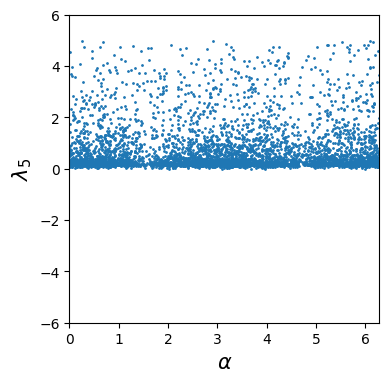

In [104]:
def scan_plot1():
    plt.figure(figsize=pic_size)
    plt.scatter(m_min,m_max,s=1)   # scatter plot
    plt.xlabel(r'$ m_{min}(GeV) $', fontsize=15)
    plt.ylabel(r'$ m_{max}(GeV) $', fontsize=15)
    plt.xlim(0,130)
    plt.ylim(0,1000)
def scan_plot2():
    plt.figure(figsize=pic_size)
    plt.scatter(save_re_lambda_9,save_lambda_89,s=1)   # scatter plot
    plt.xlabel(r'$ \lambda_1 $', fontsize=15)
    plt.ylabel(r'$ \lambda_5 $', fontsize=15)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
def scan_plot3():
    plt.figure(figsize=pic_size)
    plt.scatter(save_gamma_1,save_gamma_2,s=1)   # scatter plot
    plt.xlabel(r'$ \alpha $', fontsize=15)
    plt.ylabel(r'$ \beta $', fontsize=15)
    plt.xlim(0,2*pi)
    plt.ylim(0,2*pi)
def scan_plot4():
    plt.figure(figsize=pic_size)
    plt.scatter(save_gamma_2,save_lambda_1,s=1)   # scatter plot
    plt.xlabel(r'$ \alpha $', fontsize=15)
    plt.ylabel(r'$ \lambda_5 $', fontsize=15)
    plt.xlim(0,2*pi)
    plt.ylim(-6,6)
# scan_plot1()
# scan_plot2()
# scan_plot3()
scan_plot4()

In [8]:
print(cos(0.5))

0.8775825618903728
